In [ ]:
#upload data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
import sklearn

In [ ]:
#read data 
instagram_data = pd.read_csv(r'/content/drive/MyDrive/data/Instagram User Stats.csv')
#instagram_data.drop('id', axis = 1, inplace = True)
lpos=[]
lflr=[]
lflg=[]
leg=[]
ler=[]
lfg=[]
lop=[]
for i in instagram_data.index:
  if (instagram_data['id'][i]<=10000):
    lpos.append(instagram_data['pos'][i])
    lflr.append(instagram_data['flr'][i])
    lflg.append(instagram_data['flg'][i])
    leg.append(instagram_data['eg'][i])
    ler.append(instagram_data['er'][i])
    lfg.append(instagram_data['fg'][i])
    lop.append(instagram_data['op'][i])
  else:
    break    
df=pd.DataFrame({"pos":lpos,
                "flr":lflr,
                "flg":lflg,"eg":leg,"er":leg,"fg":lfg,"op":lop,}) 
scaler = StandardScaler()
instagram_data_scaled = scaler.fit_transform(df)

In [ ]:
#model autoencoder
input_df = Input( shape = (7, ))
x = Dense(20, activation = 'relu')(input_df)
#x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(6, activation ='relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(20, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(7, kernel_initializer='glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#training data 
autoencoder.fit(instagram_data_scaled, instagram_data_scaled, batch_size= 120, epochs = 20, verbose = 1)

Epoch 1/20
84/84 [==============================] - 3s 2ms/step - loss: 1.0360
Epoch 2/20
84/84 [==============================] - 0s 2ms/step - loss: 0.5104
Epoch 3/20
84/84 [==============================] - 0s 2ms/step - loss: 0.1928
Epoch 4/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0758
Epoch 5/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0348
Epoch 6/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 7/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 8/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 9/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 10/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 11/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 12/20
84/84 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 13/20
84/84 [==============================

In [ ]:
#predect data compression
pred = encoder.predict(instagram_data_scaled)

In [ ]:
#spectral algorithm
spectral = SpectralClustering(n_clusters=4)
spectral.fit_predict(instagram_data_scaled)
labels_c2 = spectral.labels_
#metrics
silhouette_avg = silhouette_score(instagram_data_scaled, labels_c2)
Davies_M= sklearn.metrics.davies_bouldin_score(instagram_data_scaled, labels_c2)
Calinski_Harabaz=metrics.calinski_harabasz_score(instagram_data_scaled, labels_c2)  

print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


300.266393622917
0.04927990970081644
0.929020790615927


In [ ]:
#use this code when you need to save the list of label 
fichier = open("l10000features_spectralAE.txt", "w")
st=""
for i in labels_finale:
  st=str(i)
  fichier.write(st+" ")
fichier.write(st+"\n")    
fichier.close()

In [ ]:
print(labels_c2)

[2 2 2 ... 2 2 2]


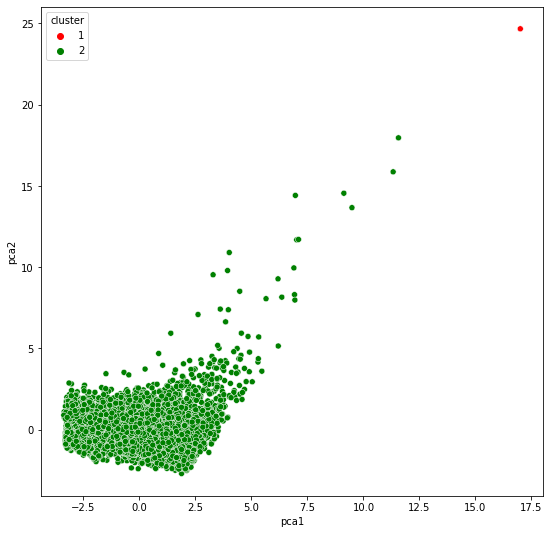

In [ ]:
#show the data
pca = PCA(n_components = 2)
principal_comp2 = pca.fit_transform(instagram_data_scaled)
pca_df2 = pd.DataFrame(data = principal_comp2, columns = ['pca1', 'pca2'])
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster': labels_c2})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df2, palette = ['red','green'])
#palette = ['red','green','blue','pink','brown','yellow']nt(get_modularity(graph_community, dict))